# Wrangle and Analyze Data

## Project Details

Your tasks in this project are as follows:

Data wrangling, which consists of:

**Gathering data** (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).

**Assessing data**

**Cleaning data**

**Storing**, **analyzing**, and **visualizing** your wrangled data
Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

In [2]:
import pandas as pd 
import numpy as np 
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


# Gathering data

In [3]:
# read the cvs file 'twitter-archive-enhanced.csv'
tweet_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# download the image_predictions.tsv programmatically using the Requests library 
r = requests.get(' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', 'wb') as f:
        f.write(r.content)
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
#### I commented writing json file code and I use Udacity file....

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = tweet_df.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
 #       print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
 #           print("Success")
  #          json.dump(tweet._json, outfile)
   #         outfile.write('\n')
    #    except tweepy.TweepError as e:
     #       print("Fail")
      #      fails_dict[tweet_id] = e
       #     pass
#end = timer()


In [6]:
## 'https://www.datacamp.com/community/tutorials/json-data-python]
## 'https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/'

# read this tweet-json.txt file line by line into a pandas DataFrame
json_list = []

with open('tweet-json.txt') as j:
    for line in j:
        json_data = json.loads(line)
        json_list.append({'tweet_id': json_data['id'],
                          'full_text': json_data['full_text'],
                          'favorits' : json_data['favorite_count'],
                          'favorited': json_data['favorited'],
                          #'followers': json_data['followers_count'],
                          #'friends': json_data['friends_count'],
                          'retweets': json_data['retweet_count'],
                          'retweeted': json_data['retweeted']
                         })
        
json_df = pd.DataFrame(json_list, columns = ['tweet_id','full_text', 'favorits', 'favorited','retweets','retweeted'])


# Assessing Data

In [7]:
#'twitter-archive-enhanced.csv' 
tweet_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
tweet_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
tweet_df.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [11]:
tweet_df.tweet_id.duplicated().sum()

0

In [12]:
tweet_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
tweet_df.expanded_urls.isnull().sum()

59

In [14]:
tweet_df.expanded_urls.duplicated().sum()

137

In [15]:
tweet_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
tweet_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Daisy           7
Buddy           7
an              7
Bailey          7
Toby            7
Scout           6
Stanley         6
Milo            6
Jack            6
Dave            6
Oscar           6
Leo             6
Bella           6
Rusty           6
Jax             6
Koda            6
Finn            5
             ... 
Donny           1
Eugene          1
Deacon          1
Emmie           1
Bruno           1
Augie           1
Leonidas        1
Shiloh          1
Toffee          1
Shnuggles       1
Skye            1
Snoop           1
Daniel          1
Banjo           1
Oreo            1
Dex             1
Shikha          1
Kirk            1
Chesterson      1
Bruiser         1
Sprout          1
Brooks          1
Grey            1
Suki            1
Ralphé    

In [17]:
tweet_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
#'image_predictions.tsv'
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [20]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
image_prediction.jpg_url.duplicated().sum()

66

In [22]:
image_prediction.jpg_url.isnull().sum()

0

In [23]:
image_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [24]:
image_prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [25]:
image_prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [26]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [27]:
#json file
json_df

,tweet_id,full_text,favorits,favorited,retweets,retweeted
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,39467,False,8853,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,33819,False,6514,False
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,25461,False,4328,False
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,42908,False,8964,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,41048,False,9774,False
5,891087950875897856,Here we have a majestic great white breaching ...,20562,False,3261,False
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,12041,False,2158,False
7,890729181411237888,When you watch your owner call another dog a g...,56848,False,16716,False
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,28226,False,4429,False
9,890240255349198849,This is Cassie. She is a college pup. Studying...,32467,False,7711,False


In [28]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id     2354 non-null int64
full_text    2354 non-null object
favorits     2354 non-null int64
favorited    2354 non-null bool
retweets     2354 non-null int64
retweeted    2354 non-null bool
dtypes: bool(2), int64(3), object(1)
memory usage: 69.0+ KB


In [29]:
json_df.describe()

,tweet_id,favorits,retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [30]:
json_df.favorited.value_counts()

False    2346
True        8
Name: favorited, dtype: int64

In [31]:
json_df.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

In [32]:
json_df.full_text.head(30) , tweet_df.text.head(30)

(0     This is Phineas. He's a mystical boy. Only eve...
 1     This is Tilly. She's just checking pup on you....
 2     This is Archie. He is a rare Norwegian Pouncin...
 3     This is Darla. She commenced a snooze mid meal...
 4     This is Franklin. He would like you to stop ca...
 5     Here we have a majestic great white breaching ...
 6     Meet Jax. He enjoys ice cream so much he gets ...
 7     When you watch your owner call another dog a g...
 8     This is Zoey. She doesn't want to be one of th...
 9     This is Cassie. She is a college pup. Studying...
 10    This is Koda. He is a South Australian decksha...
 11    This is Bruno. He is a service shark. Only get...
 12    Here's a puppo that seems to be on the fence a...
 13    This is Ted. He does his best. Sometimes that'...
 14    This is Stuart. He's sporting his favorite fan...
 15    This is Oliver. You're witnessing one of his m...
 16    This is Jim. He found a fren. Taught him how t...
 17    This is Zeke. He has a n

### Tidiness 

- unused columns 
- merge "doggo", "floofer", "pupper", "puppo" to one column
- merge 3 tables to one dataset 

### Quality

- tweet_id datatype 
- unacceptable dogs names in tweet_df like "a", "None", "the", "just"
- lower case for dogs names in tweet_df 
- None in "doggo", "floofer", "pupper", "puppo"
- Incorrect values in rating numerators
- lower case name in "p1", "p2", and "p3" in image_prediction
- underscores in in "p1", "p2", and "p3" in image_prediction
- missing data 
- text column has retweets

# Cleanning Data 

In [91]:
tweet_df_clean = tweet_df.copy()
image_prediction_clean = image_prediction.copy()
json_df_clean = json_df.copy()

In [92]:
tweet_df_clean.shape[0], image_prediction_clean.shape[0], json_df_clean.shape[0]

(2356, 2075, 2354)

### Quality1: missing data

#### define 
 there are 2356 recods in tweet_df and 2075 in image_prediction and 2354 

### Tidiness1: merge 3 tables to one dataset 

#### define 

It is easier to deal with on table instead of 3 tables. Also, merge dataset slove the missing data problem 

#### Code

In [93]:
df = pd.merge(tweet_df_clean, image_prediction_clean , on='tweet_id')
wrangle_act = pd.merge(df, json_df_clean , on='tweet_id')

#### Test

In [94]:
wrangle_act.shape

(2073, 33)

In [95]:
wrangle_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 33 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

In [96]:
wrangle_act.expanded_urls.duplicated().sum()

0

### Tidiness2: unused columns 
#### define

there are 33 columns in the dataset we need to drop unused columns 

#### Code 

In [97]:
wrangle_act = wrangle_act.drop(["in_reply_to_status_id", "in_reply_to_user_id", "timestamp", "text", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1)

#### Test

In [98]:
wrangle_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id              2073 non-null int64
source                2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_conf               2073 non-null float64
p3_dog                2073 non-null bo

### Quality2: text column has retweet
#### define 

there is some retweets need to drop 

#### Code 

In [99]:
sum(wrangle_act['full_text'].str.startswith('RT') != False)

80

In [105]:
## 80 records should be delete
wrangle_act = wrangle_act.loc[wrangle_act['full_text'].str.startswith('RT') == False]

#### Test 

In [106]:
wrangle_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 26 columns):
tweet_id              1993 non-null int64
source                1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1993 non-null object
doggo                 1993 non-null object
floofer               1993 non-null object
pupper                1993 non-null object
puppo                 1993 non-null object
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bo

### Quality3: None in "doggo", "floofer", "pupper", "puppo"
#### define 
replace the None to np.nan
### Tidiness3: merge "doggo", "floofer", "pupper", "puppo" to one column

#### define 
 we need to  merge 3 columns to one column "dog_stage". after that, dropping unuseful columns. 

#### Code

In [107]:
#wrangle_act['dog_stage'] = wrangle_act['full_text'].str.extract('(doggo|floofer|pupper|puppo)', expand=False)
#drop columns
#wrangle_act = wrangle_act.drop(["doggo", "floofer", "pupper", "puppo"], axis=1)

In [108]:
wrangle_act.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1687
1,None,None,None,puppo,22
2,None,None,pupper,None,203
3,None,floofer,None,None,7
4,doggo,None,None,None,63
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,9
7,doggo,floofer,None,None,1


In [109]:
wrangle_act.doggo = wrangle_act.doggo.replace('None', "")
wrangle_act.floofer = wrangle_act.floofer.replace('None', "")
wrangle_act.pupper = wrangle_act.pupper.replace('None', "")
wrangle_act.puppo = wrangle_act.puppo.replace('None', "")

In [110]:
# Remember to convert None to empty string "" for all columns prior to
# running the following code.

wrangle_act['dog_stage'] = wrangle_act.doggo + wrangle_act.floofer + wrangle_act.pupper + wrangle_act.puppo
wrangle_act.loc[wrangle_act.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
wrangle_act.loc[wrangle_act.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
wrangle_act.loc[wrangle_act.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

wrangle_act.dog_stage = wrangle_act.dog_stage.replace("", np.nan)

#drop columns
wrangle_act = wrangle_act.drop(["doggo", "floofer", "pupper", "puppo"], axis=1)

#### Test

In [111]:
wrangle_act.dog_stage.value_counts()

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

In [112]:
wrangle_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id              1993 non-null int64
source                1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1993 non-null object
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
full_text             1993 non-null object
favorits              1993 non-null int64
favorited             1993 non-null bool
retweets              1993 non-null int64
r

### Quality4: tweet_id datatype
#### define 

tweet_id should be object not intger

#### code 

In [113]:
wrangle_act.tweet_id = wrangle_act.tweet_id.astype(str)

#### test 

In [114]:
wrangle_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id              1993 non-null object
source                1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1993 non-null object
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
full_text             1993 non-null object
favorits              1993 non-null int64
favorited             1993 non-null bool
retweets              1993 non-null int64


### Quality5: Incorrect values in rating numerators
#### define
Rating numerators have not been properly cleaned. The current pipeline captures incorrect values when rating numerators contain decimals. For example, here is a value from one observation with tweet id 786709082849828864:

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

#### Code

In [115]:
ratings = wrangle_act.full_text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

wrangle_act['numerator'] = ratings[0]
wrangle_act['denominator'] = ratings[1]
#drop columns
wrangle_act = wrangle_act.drop(['rating_numerator', 'rating_denominator'], axis = 1)

In [116]:
# numerator & denominator should change datatype 
wrangle_act.numerator = wrangle_act.numerator.astype('float64')
wrangle_act.denominator = wrangle_act.denominator.astype('int64')

#### Test

In [117]:
wrangle_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id         1993 non-null object
source           1993 non-null object
expanded_urls    1993 non-null object
name             1993 non-null object
jpg_url          1993 non-null object
img_num          1993 non-null int64
p1               1993 non-null object
p1_conf          1993 non-null float64
p1_dog           1993 non-null bool
p2               1993 non-null object
p2_conf          1993 non-null float64
p2_dog           1993 non-null bool
p3               1993 non-null object
p3_conf          1993 non-null float64
p3_dog           1993 non-null bool
full_text        1993 non-null object
favorits         1993 non-null int64
favorited        1993 non-null bool
retweets         1993 non-null int64
retweeted        1993 non-null bool
dog_stage        306 non-null object
numerator        1993 non-null float64
denominator      1993 non-null int64
dtypes: bool(5), float64(4), i

In [118]:
print(wrangle_act[['numerator', 'denominator']])

      numerator  denominator
0          13.0           10
1          13.0           10
2          12.0           10
3          13.0           10
4          12.0           10
5          13.0           10
6          13.0           10
7          13.0           10
8          13.0           10
9          14.0           10
10         13.0           10
11         13.0           10
12         13.0           10
13         12.0           10
14         13.0           10
15         13.0           10
16         12.0           10
17         13.0           10
18         13.0           10
19         12.0           10
20         13.0           10
21         14.0           10
22         13.0           10
23         13.0           10
24         12.0           10
25         13.0           10
26         13.0           10
27         13.0           10
28         12.0           10
29         13.0           10
...         ...          ...
2043        2.0           10
2044        7.0           10
2045        9.

In [119]:
print(wrangle_act.numerator[wrangle_act['tweet_id'] == '786709082849828864'])

558    9.75
Name: numerator, dtype: float64


### Quality6: unacceptable dogs names in tweet_df like "a", "None", "the", "just", etc.
#### define

there are unacceptable names in name columns and all of them in lower case except 'None'. first, we need to replace it with 'None'. then, replace it with np.nan 

#### Code

In [120]:
for name in wrangle_act.name:
    if name.islower():
        name.replace(name, 'None')
        
wrangle_act.name = wrangle_act.name.replace('None', np.nan)

#### Test

In [121]:
wrangle_act.name.isnull().sum()

545

In [122]:
wrangle_act.name.sample(10)

256       Lipton
1855     Randall
1944      Sophie
412         Halo
1612         NaN
1343      Horace
1243         NaN
1063      Walker
918      Ralpher
340     Sundance
Name: name, dtype: object

### Quality7: lower case for dogs names in tweet_df

#### define

 change names case to lowercase for dogs names 

#### code

In [123]:
wrangle_act.name = wrangle_act.name.str.lower()

#### Test

In [124]:
wrangle_act.name.sample(20)

1995        NaN
122       belle
40        bella
1102     oliver
16          jim
1782       herm
1242        NaN
729     spencer
1868    chester
545          bo
379       comet
343       flash
699       glenn
1445      ellie
1139      socks
79          NaN
1364      alfie
658     charlie
125       zooey
498       daisy
Name: name, dtype: object

### Quality8: lower case name in "p1", "p2", and "p3" in image_prediction

#### define

change p1, p2, p3 to lowercase

#### code

In [125]:
wrangle_act.p1 = wrangle_act.p1.str.lower()
wrangle_act.p2 = wrangle_act.p2.str.lower()
wrangle_act.p3 = wrangle_act.p3.str.lower()

#### Test

In [126]:
wrangle_act

,tweet_id,source,expanded_urls,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,...,p3_conf,p3_dog,full_text,favorits,favorited,retweets,retweeted,dog_stage,numerator,denominator
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,...,0.076110,False,This is Phineas. He's a mystical boy. Only eve...,39467,False,8853,False,NaN,13.0,10
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,...,0.068957,True,This is Tilly. She's just checking pup on you....,33819,False,6514,False,NaN,13.0,10
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,...,0.031379,True,This is Archie. He is a rare Norwegian Pouncin...,25461,False,4328,False,NaN,12.0,10
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,...,0.040836,False,This is Darla. She commenced a snooze mid meal...,42908,False,8964,False,NaN,13.0,10
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,...,0.175219,True,This is Franklin. He would like you to stop ca...,41048,False,9774,False,NaN,12.0,10
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891087950...,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,chesapeake_bay_retriever,0.425595,True,irish_terrier,...,0.076902,False,Here we have a majestic great white breaching ...,20562,False,3261,False,NaN,13.0,10
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...","https://gofundme.com/ydvmve-surgery-for-jax,ht...",jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703,True,border_collie,...,0.193548,False,Meet Jax. He enjoys ice cream so much he gets ...,12041,False,2158,False,NaN,13.0,10
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890729181...,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,True,eskimo_dog,...,0.076507,True,When you watch your owner call another dog a g...,56848,False,16716,False,NaN,13.0,10
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890609185...,zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,0.487574,True,irish_setter,...,0.118184,True,This is Zoey. She doesn't want to be one of th...,28226,False,4429,False,NaN,13.0,10
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890240255...,cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,0.511319,True,cardigan,...,0.029248,True,This is Cassie. She is a college pup. Studying...,32467,False,7711,False,doggo,14.0,10


### Quality8: underscores in in "p1", "p2", and "p3" in image_prediction***

#### define

#### code

In [127]:
wrangle_act['p1'] = wrangle_act.p1.str.replace('_', ' ')
wrangle_act['p2'] = wrangle_act.p2.str.replace('_', ' ')
wrangle_act['p3'] = wrangle_act.p3.str.replace('_', ' ')

#### Test

In [128]:
wrangle_act.p1.sample(10)

515                golden retriever
1438                     pomeranian
1723    west highland white terrier
1425                      birdhouse
1367                  border collie
950                           teddy
1906                      jellyfish
1598               golden retriever
35                             chow
541                            chow
Name: p1, dtype: object

In [129]:
wrangle_act.p2.sample(10)

362          welsh springer spaniel
904                      toy poodle
1492                  window screen
972                     groenendael
1887    german short-haired pointer
150              labrador retriever
1959                          boxer
1390                     toy poodle
422                        cardigan
1772                          snail
Name: p2, dtype: object

In [130]:
wrangle_act.p3.sample(10)

464             bluetick
1488    golden retriever
1000    golden retriever
198         newfoundland
1964          schipperke
1153      soap dispenser
1046     german shepherd
566              echidna
178             pembroke
488             papillon
Name: p3, dtype: object

# Storing 

In [133]:
wrangle_act.to_csv('twitter_archive_master.csv')

 # Analyzing, and Visualizing

In [134]:
wrangle_act.dog_stage.value_counts()

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

### Q1: what is the percentage of each dog stage? 

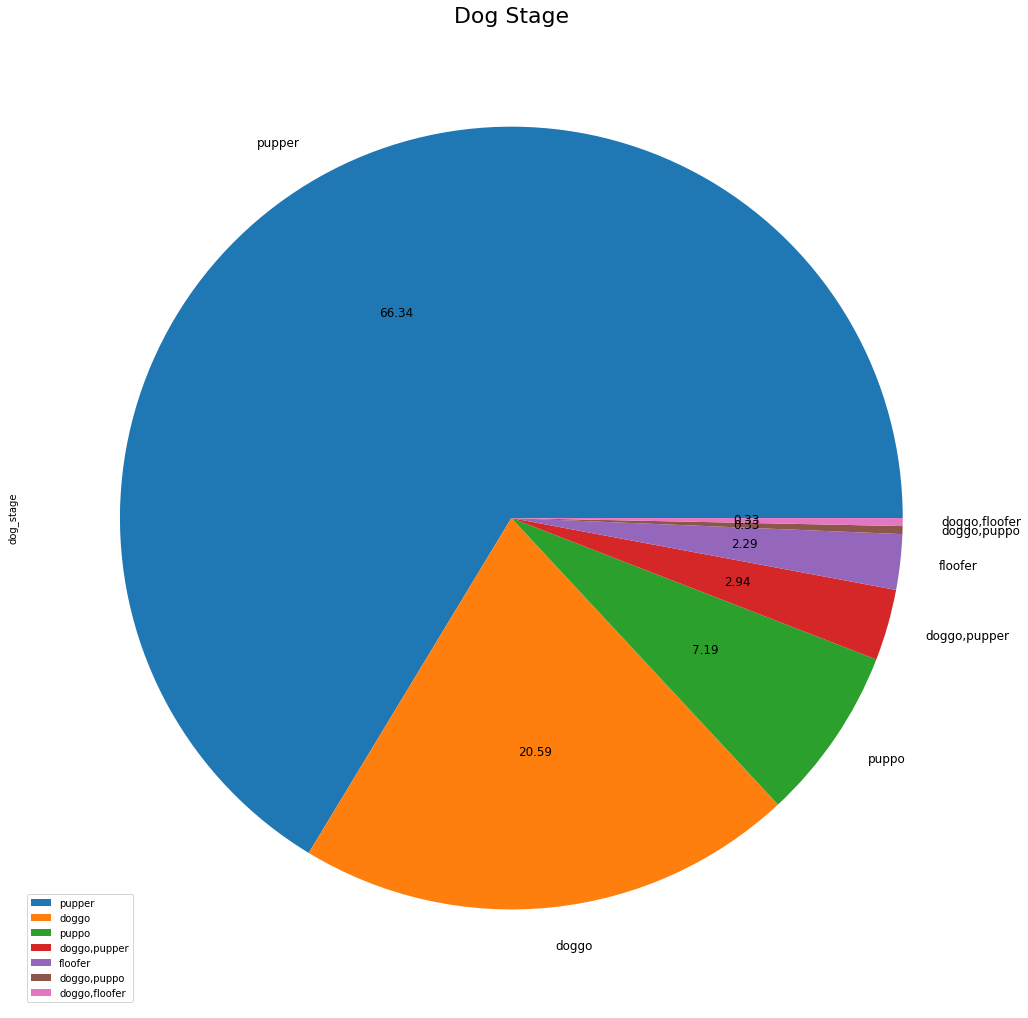

In [141]:
wrangle_act.dog_stage.value_counts().plot.pie(labels=['pupper', 'doggo', 'puppo', 'doggo,pupper', 'floofer', 'doggo,puppo', 'doggo,floofer'],
                                              autopct='%.2f', figsize=(18,18), stacked=True, fontsize=12)

plt.title('Dog Stage', fontsize=22)
plt.legend();

### Q2: what dog stage have maximum rating ? 

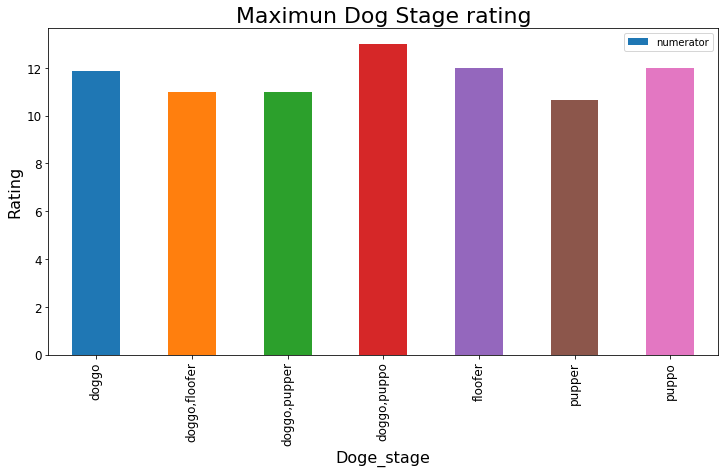

In [142]:
wrangle_act.groupby('dog_stage').numerator.mean().plot.bar(figsize=(12,6), stacked=True, fontsize=12)
plt.title('Maximun Dog Stage rating', fontsize=22)
plt.xlabel('Doge_stage', fontsize=16)
plt.ylabel('Rating', fontsize=16);
plt.legend();

In [143]:
wrangle_act.groupby('dog_stage').numerator.mean()

dog_stage
doggo            11.888889
doggo,floofer    11.000000
doggo,pupper     11.000000
doggo,puppo      13.000000
floofer          12.000000
pupper           10.636798
puppo            12.000000
Name: numerator, dtype: float64

### Q3: what dog stage got the maximum retweet?

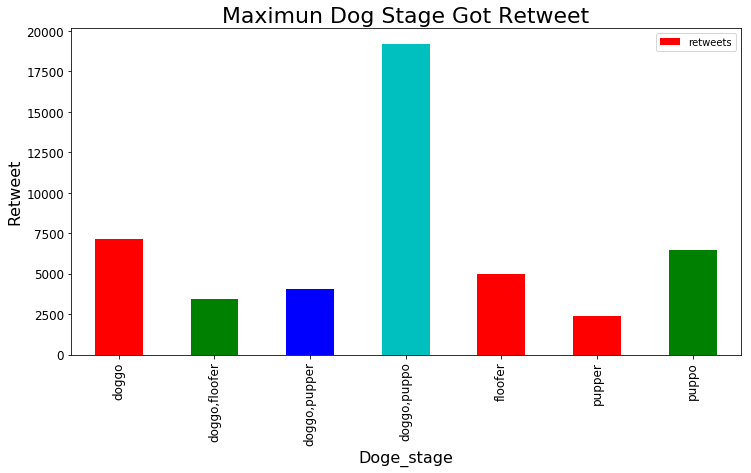

In [144]:
wrangle_act.groupby('dog_stage').retweets.mean().plot.bar(figsize=(12,6), stacked=True, fontsize=12, color=['r', 'g', 'b', 'c'])
plt.title('Maximun Dog Stage Got Retweet', fontsize=22)
plt.xlabel('Doge_stage', fontsize=16)
plt.ylabel('Retweet', fontsize=16);
plt.legend();

In [145]:
wrangle_act.groupby('dog_stage').retweets.mean()

dog_stage
doggo             7125.698413
doggo,floofer     3433.000000
doggo,pupper      4083.444444
doggo,puppo      19196.000000
floofer           4968.714286
pupper            2363.581281
puppo             6473.954545
Name: retweets, dtype: float64

### Q4: what dog stage got the maximum favorit?

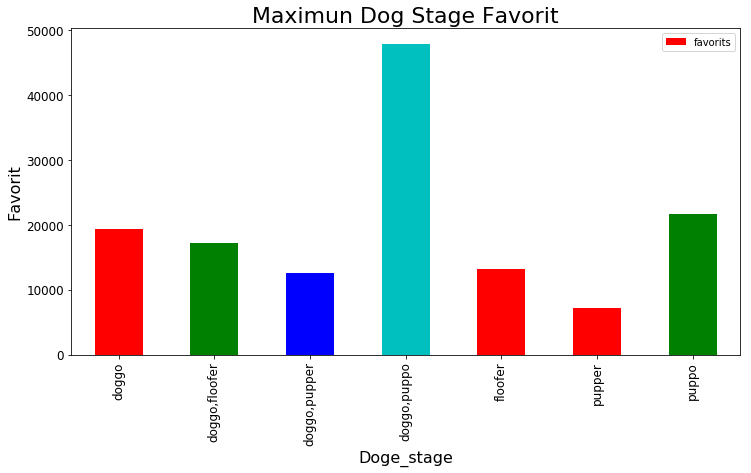

In [146]:
wrangle_act.groupby('dog_stage').favorits.mean().plot.bar(figsize=(12,6), stacked=True, fontsize=12, color=['r', 'g', 'b', 'c'])
plt.title('Maximun Dog Stage Favorit', fontsize=22)
plt.xlabel('Doge_stage', fontsize=16)
plt.ylabel('Favorit', fontsize=16);
plt.legend();

In [147]:
wrangle_act.groupby('dog_stage').favorits.mean()

dog_stage
doggo            19356.380952
doggo,floofer    17169.000000
doggo,pupper     12533.111111
doggo,puppo      47844.000000
floofer          13206.000000
pupper            7197.738916
puppo            21582.090909
Name: favorits, dtype: float64

### Q5: What is the most used source?

In [148]:
wrangle_act.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1954
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

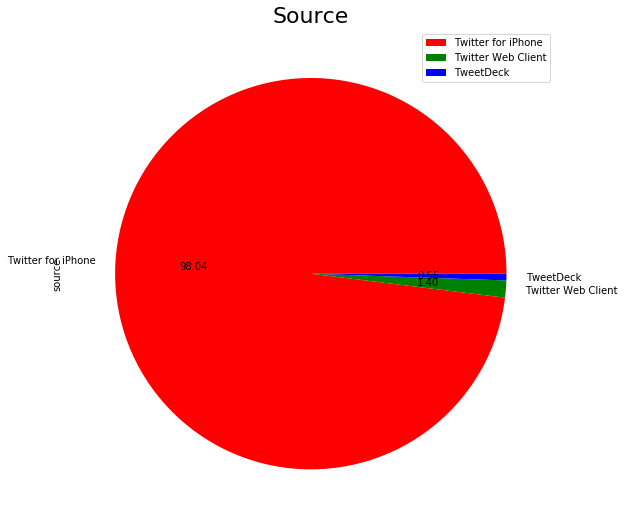

In [149]:
wrangle_act.source.value_counts().plot.pie(labels=['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'], autopct='%.2f',
                                              colors=['r', 'g', 'b'], figsize=(9,9), stacked=True, fontsize=10)

plt.title('Source', fontsize=22)
plt.legend();